<a href="https://colab.research.google.com/github/Nishanaziya/DSML/blob/master/knn_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [15]:
df = pd.read_csv("/content/wine (1).csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
df.fillna(df.mean(), inplace=True)

<ipython-input-16-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [17]:
x = df.drop(["type","quality"], axis =1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [18]:
y = df["quality"]
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
x = standard.fit_transform(x)
x

array([[-0.1671586 , -0.4235636 ,  0.28424515, ..., -1.35966451,
        -0.5459591 , -1.41855821],
       [-0.70742728, -0.24123152,  0.14652315, ...,  0.50804501,
        -0.27706392, -0.83161516],
       [ 0.68183504, -0.36278624,  0.55968916, ...,  0.25901707,
        -0.6131829 , -0.32852111],
       ...,
       [-0.70742728,  1.03509307, -1.2995579 , ...,  1.25512882,
         1.47075478,  0.42611996],
       [-1.01615224,  1.85558744, -1.3684189 , ...,  2.18898358,
         1.2018596 , -0.2446721 ],
       [-0.938971  , -0.18045416,  1.04171618, ...,  1.06835787,
         0.86574062,  0.42611996]])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =42)

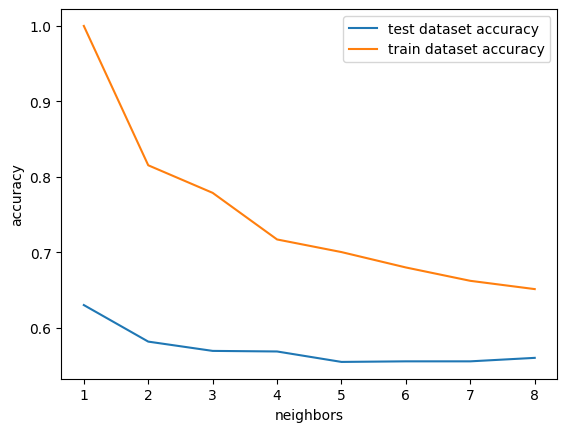

In [29]:
neighbors = np.arange(1,9)
test_accuracy = np.empty(len(neighbors))
train_acccuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)

  test_accuracy[i] = knn.score(x_test,y_test)
  train_acccuracy[i] = knn.score(x_train, y_train)

plt.plot(neighbors, test_accuracy, label="test dataset accuracy")
plt.plot(neighbors, train_acccuracy, label="train dataset accuracy")
plt.legend()

plt.xlabel("neighbors")
plt.ylabel("accuracy")
plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

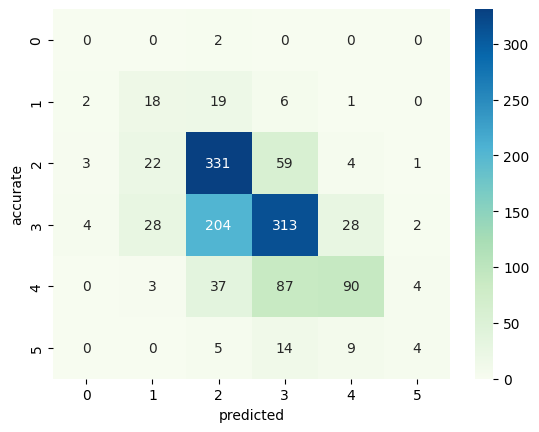

In [31]:
y_predict = knn.predict(x_test)

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot= True, cmap="GnBu", fmt="d")
plt.xlabel("predicted")
plt.ylabel("accurate")
plt.show()

In [32]:
print("accuracy: ", knn.score(x_test,y_test))

accuracy:  0.5815384615384616
